## Data Cleaning & Wrangling

In [29]:
import pandas as pd
# formatting display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import numpy as np
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
import pdpbox
import seaborn as sns
import shap

from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
# food choices dataset
df = pd.read_csv('food_coded.csv')

In [31]:
df.head(30)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,3.0,4,NaN,My current diet is terrible. I barely have tim...,2,2.0,Eating rice everyday. Eating less homemade food.,1,3,1,3.0,4,2.0,1.0,Taxi Driver,African,6,3.0,"Fries, plaintain & fried fish",1,2,2,2,4,"Requires veggies, fruits and a cooked meal.",My ideal diet is to eat 3 times a day includin...,2,1.0,5,5,4.0,2.0,Anything they'd want. I'd ask them before hand...,1.0,Hair Braider,1,1.0,2,5,5.0,5.0,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,2.0,1,1.0,I eat a lot of chicken and broccoli for dinner...,3,1.0,I started eating

In [32]:
df = df.drop(columns=['GPA','calories_day', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded.1', 
        'diet_current', 'eating_changes', 'eating_changes_coded', 'father_profession', 'fav_cuisine', 
        'food_childhood', 'healthy_meal', 'ideal_diet', 'meals_dinner_friend', 'mother_profession', 
        'type_sports', 'Gender', 'employment', 'exercise', 'father_education', 'father_profession', 'grade_level', 'healthy_feeling',
         'income', 'life_rewarding', 'marital_status', 'mother_education', 'nutritional_check', 'pay_meal_out', 'sports', 'type_sports', 'self_perception_weight'])

In [33]:
# Checking types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 31 columns):
breakfast                     125 non-null int64
calories_chicken              125 non-null int64
calories_scone                124 non-null float64
coffee                        125 non-null int64
comfort_food_reasons_coded    106 non-null float64
cook                          122 non-null float64
cuisine                       108 non-null float64
diet_current_coded            125 non-null int64
drink                         123 non-null float64
eating_changes_coded1         125 non-null int64
eating_out                    125 non-null int64
ethnic_food                   125 non-null int64
fav_cuisine_coded             125 non-null int64
fav_food                      123 non-null float64
fries                         125 non-null int64
fruit_day                     125 non-null int64
greek_food                    125 non-null int64
ideal_diet_coded              125 non-null int64
i

In [34]:
df.sample(20)

,breakfast,calories_chicken,calories_scone,coffee,comfort_food_reasons_coded,cook,cuisine,diet_current_coded,drink,eating_changes_coded1,eating_out,ethnic_food,fav_cuisine_coded,fav_food,fries,fruit_day,greek_food,ideal_diet_coded,indian_food,italian_food,on_off_campus,parents_cook,persian_food,soup,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
73,1,720,420.0,2,2.0,1.0,1.0,2,2.0,12,4,3,2,1.0,1,3,3,3,1,5,3.0,1,1.0,1.0,2,1165.0,850,4,1,1315,200
74,2,265,420.0,1,9.0,2.0,4.0,4,2.0,4,1,3,0,2.0,1,4,3,8,3,3,2.0,3,3.0,1.0,3,580.0,345,4,2,760,NaN
94,1,610,420.0,2,5.0,2.0,NaN,1,2.0,3,2,5,1,1.0,1,5,5,7,5,5,1.0,1,5.0,1.0,5,940.0,690,5,1,1315,175
76,2,610,420.0,1,2.0,2.0,1.0,2,2.0,3,2,2,5,3.0,1,4,2,3,1,5,2.0,1,1.0,2.0,1,1165.0,690,2,2,1315,150
86,1,610,420.0,2,2.0,2.0,1.0,1,2.0,5,1,4,4,3.0,1,5,4,5,4,5,1.0,1,3.0,1.0,4,580.0,500,4,1,900,190
108,1,430,420.0,2,NaN,5.0,1.0,1,2.0,2,2,2,1,2.0,1,5,2,1,5,5,1.0,2,2.0,1.0,2,580.0,345,5,2,760,128
16,1,265,420.0,1,1.0,3.0,NaN,1,1.0,5,1,2,7,1.0,1,5,2,2,5,3,1.0,2,2.0,1.0,1,580.0,345,5,1,760,145
21,1,610,315.0,1,2.0,3.0,3.0,2,NaN,8,1,3,8,2.0,1,3,5,7,5,5,1.0,3,5.0,2.0,5,725.0,500,2,2,900,195
19,1,430,420.0,2,2.0,4.0,1.0,2,2.0,4,2,3,1,1.0,1,2,3,3,2,5,1.0,1,3.0,1.0,3,940.0,345,2,2,900,165
42,1,610,420.0,2,2.0,4.0,1.0,2,2.0,3,2,3,1,1.0,1,5,5,1,4,5,1.0,2,2.0,1.0,4,940.0,500,4,2,900,135


In [35]:
# Checking null values
df.isnull().sum()

breakfast                      0
calories_chicken               0
calories_scone                 1
coffee                         0
comfort_food_reasons_coded    19
cook                           3
cuisine                       17
diet_current_coded             0
drink                          2
eating_changes_coded1          0
eating_out                     0
ethnic_food                    0
fav_cuisine_coded              0
fav_food                       2
fries                          0
fruit_day                      0
greek_food                     0
ideal_diet_coded               0
indian_food                    0
italian_food                   0
on_off_campus                  1
parents_cook                   0
persian_food                   1
soup                           1
thai_food                      0
tortilla_calories              1
turkey_calories                0
veggies_day                    0
vitamins                       0
waffle_calories                0
weight    

In [36]:
# checking target null values
df['weight'].isnull().sum()

2

In [37]:
# dropping target null rows
df = df.dropna(subset=['weight'])
df['weight'].isnull().sum()

0

In [38]:
# filling missing feature values
df = df.dropna()
df.isnull().sum()

breakfast                     0
calories_chicken              0
calories_scone                0
coffee                        0
comfort_food_reasons_coded    0
cook                          0
cuisine                       0
diet_current_coded            0
drink                         0
eating_changes_coded1         0
eating_out                    0
ethnic_food                   0
fav_cuisine_coded             0
fav_food                      0
fries                         0
fruit_day                     0
greek_food                    0
ideal_diet_coded              0
indian_food                   0
italian_food                  0
on_off_campus                 0
parents_cook                  0
persian_food                  0
soup                          0
thai_food                     0
tortilla_calories             0
turkey_calories               0
veggies_day                   0
vitamins                      0
waffle_calories               0
weight                        0
dtype: i

In [39]:
# cleaning values with strings. 
df['weight'].value_counts()

140                         7
155                         6
135                         6
190                         4
165                         4
150                         4
185                         4
175                         4
180                         4
125                         4
200                         3
145                         3
170                         3
120                         2
130                         2
210                         2
160                         2
105                         1
184                         1
116                         1
123                         1
127                         1
110                         1
168                         1
137                         1
265                         1
205                         1
115                         1
113                         1
112                         1
128                         1
144 lbs                     1
I'm not answering this.     1
264       

In [40]:
# replacing string values with integers and replacing 'I'm not answering this.' with the mean. 
df['weight'].replace({"Not sure, 240":'240', "144 lbs": '144', "I'm not answering this. ":"159"}, inplace=True)

In [41]:
# checking target value counts again 
df['weight'].value_counts()

140    7
135    6
155    6
175    4
180    4
150    4
185    4
125    4
165    4
190    4
145    3
200    3
170    3
160    2
120    2
210    2
130    2
127    1
116    1
184    1
123    1
159    1
240    1
110    1
168    1
137    1
265    1
205    1
115    1
113    1
128    1
144    1
105    1
264    1
167    1
169    1
112    1
230    1
Name: weight, dtype: int64

In [42]:
# converting target values to integers
df['weight'] = df['weight'].astype(int)

In [43]:
# Checking summary statistics of target value for skewness 
df['weight'].describe()

count     85.000000
mean     159.600000
std       32.853281
min      105.000000
25%      135.000000
50%      155.000000
75%      180.000000
max      265.000000
Name: weight, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=42)

In [45]:
# define target and features
target = 'weight'

In [46]:
# X matrices
X_train = train.drop(columns=target)
X_test = test.drop(columns=target)

# y vector
y_train = train[target]
y_test = test[target]

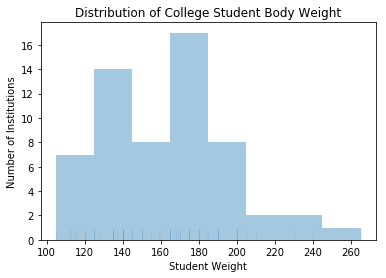

In [50]:
sns.distplot(y_train, 
             norm_hist=False,
             kde=False,
             rug=True,
             rug_kws={'alpha':0.1},
             axlabel='Student Weight')
plt.ylabel('Number of Institutions')
plt.title('Distribution of College Student Body Weight');

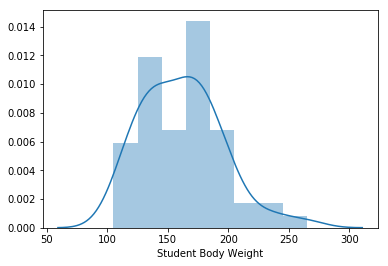

In [52]:
sns.distplot(y_train)
plt.xlabel('Student Body Weight');

In [53]:
# define error metric
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [54]:
# find median weight
median = train['weight'].median()

# predictions
y_pred = [median] * len(test)

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

MAE: 26.53846153846154
RMSE: 32.933499428627144


In [55]:
# instantiate model
rf = RandomForestRegressor()

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

MAE: 22.26192307692308
RMSE: 29.90402899276283


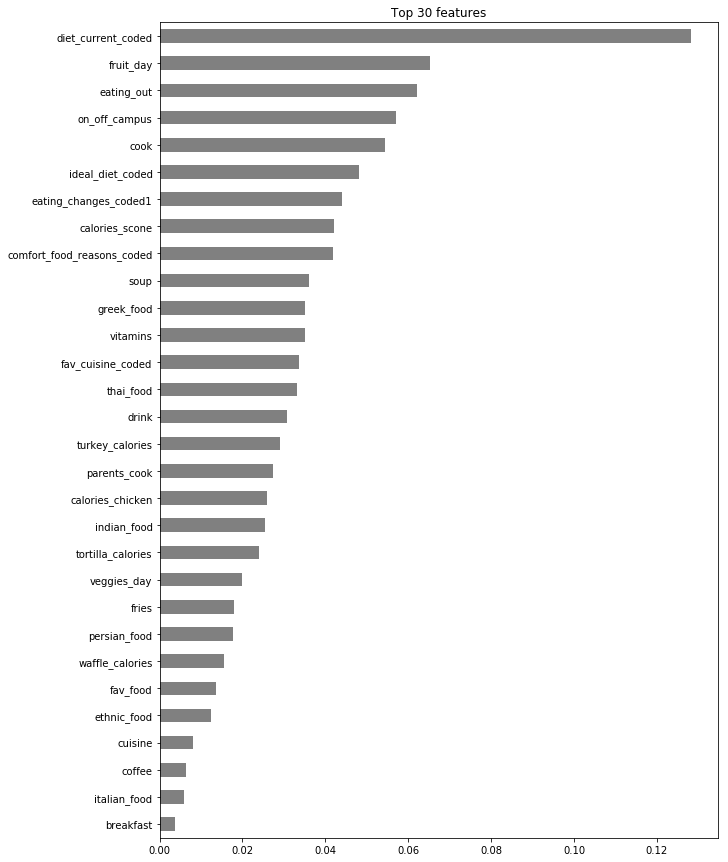

In [56]:
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [57]:
## Log transformed
y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

In [58]:
rf = RandomForestRegressor()

# fit model
rf.fit(X_train, y_log_train)

# predict
y_pred = np.exp(rf.predict(X_test))

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

MAE: 21.643726694094788
RMSE: 29.949497747574693


In [59]:
# instantiate model
rf = RandomForestRegressor()

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

MAE: 21.432307692307692
RMSE: 29.415982704331643


In [60]:
# Instantiate model
rf = XGBRegressor()

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

[18:58:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 27.25021479679988
RMSE: 35.63922584107777


In [61]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [62]:
pipeline = make_pipeline(
    OrdinalEncoder(), 
    XGBRegressor(random_state=42)
)

param_distributions = {
    'xgbregressor__n_estimators': randint(100, 1000), 
    'xgbregressor__max_depth': randint(3, 50),
    'xgbregressor__eta': uniform(0.01, 0.3)
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=15, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.1s


[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished


In [63]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSE', np.sqrt(-search.best_score_))

Best hyperparameters {'xgbregressor__eta': 0.27296085804205217, 'xgbregressor__max_depth': 38, 'xgbregressor__n_estimators': 480}
Cross-validation RMSE 37.58552401870159


In [64]:

# Instantiate model
rf = XGBRegressor(n_estimators=480,
                  max_depth= 38,
                  eta= 0.27296085804205217,
                  random_state=42,
                  n_jobs=-1)

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))

[18:59:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 25.15710155780499
RMSE: 34.54830183742415


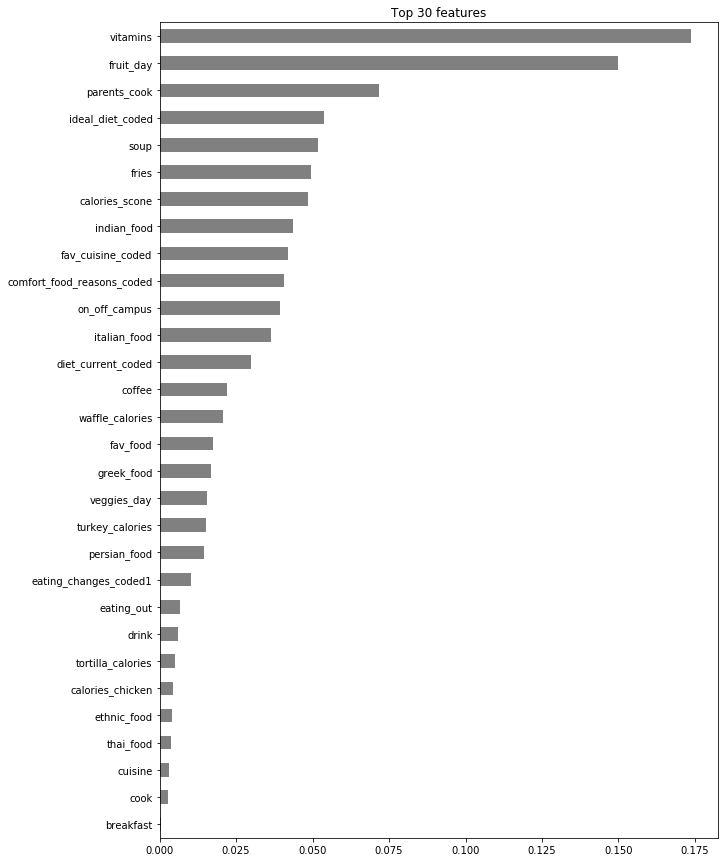

In [65]:
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [66]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'fruit_day'

isolated = pdp_isolate(
    model = rf,
    dataset=X_train,
    model_features=X_train.columns,
    feature=feature
)

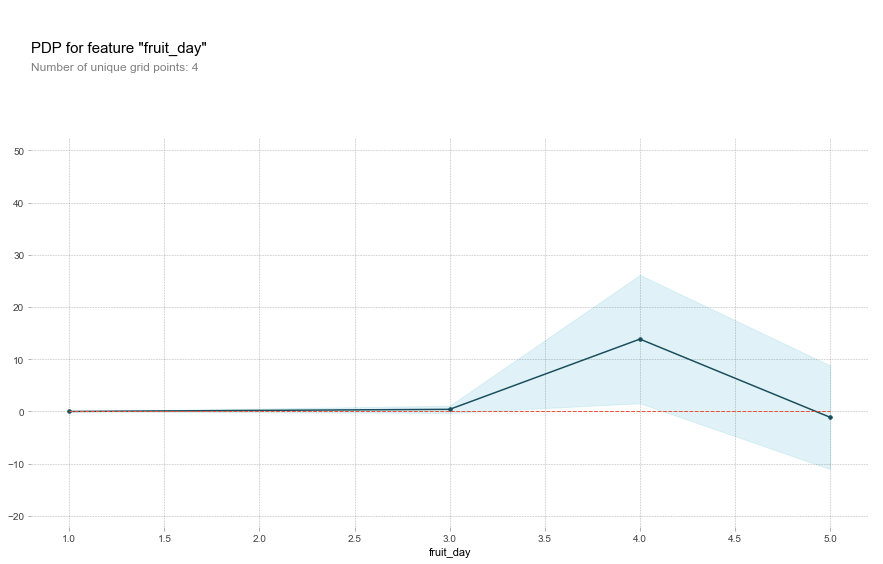

In [67]:
pdp_plot(isolated, feature_name=feature);

In [68]:
row = X_test.iloc[[0]]
row

,breakfast,calories_chicken,calories_scone,coffee,comfort_food_reasons_coded,cook,cuisine,diet_current_coded,drink,eating_changes_coded1,eating_out,ethnic_food,fav_cuisine_coded,fav_food,fries,fruit_day,greek_food,ideal_diet_coded,indian_food,italian_food,on_off_campus,parents_cook,persian_food,soup,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
97,1,720,420.0,2,2.0,3.0,1.0,1,2.0,5,2,3,1,1.0,1,5,2,2,2,5,1.0,1,1.0,1.0,3,1165.0,500,5,2,760


In [69]:
rf.predict(row)

array([158.17336], dtype=float32)